### Credit card approvals dataset classification models

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from tqdm.auto import tqdm
from sklearn.model_selection import KFold

Import and clean up

In [8]:
df = pd.read_csv('cc_approvals.csv')

In [9]:
df.columns = ['gender', 'age', 'debt', 'married', 'bankcustomer', 'educationlevel',
       'ethnicity', 'yearsemployed', 'priordefault', 'employed', 'creditscore',
       'driverslicense', 'citizen', 'zipcode', 'income', 'approvalstatus']

In [10]:
df.head()

,gender,age,debt,married,bankcustomer,educationlevel,ethnicity,yearsemployed,priordefault,employed,creditscore,driverslicense,citizen,zipcode,income,approvalstatus
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [11]:
df.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [12]:
df.approvalstatus = df.approvalstatus.replace('+', 1)
df.approvalstatus = df.approvalstatus.replace('-', 0)

In [13]:
df.approvalstatus.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# find correlations in the data - optional
matrix = df.corr()
matrix

Split df and set random state

In [44]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=2)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=2)
len(df_full_train), len(df_test), len(df_train), len(df_val)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

target = 'approvalstatus'
y_full_train = df_full_train[target]
y_test = df_test[target]
y_train = df_train[target]
y_val = df_val[target]

del df_full_train[target]
del df_test[target]
del df_train[target]
del df_val[target]

Train Logistic Regression and validate model

In [15]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)


In [40]:
model = LogisticRegression(solver='liblinear', C=0.1, max_iter=1000, random_state=2)
model.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000, random_state=2, solver='liblinear')

In [41]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred_bool = (y_pred >= 0.5).astype(int)
(y_val == y_pred_bool).mean()

0.8478260869565217

In [42]:
df_pred = pd.DataFrame()
df_pred['actual'] = y_val
df_pred['probability'] = y_pred
df_pred['prediction'] = y_pred_bool.astype(int)
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred.correct.mean().round(4)

0.8478

In [43]:
roc_auc_score(y_val,y_pred_bool)

0.8431977858207367

Model Evaluation - AUC, thresholds, f-score, kfold to refine c

In [40]:
thresholds = np.arange(0, 1.0, 0.01)
prec = []
rec = []
for t in thresholds:

    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    p = tp / (tp + fp)
    r = tp / (tp + fn)

    prec.append(p)
    rec.append(r)

columns = [ 'thresholds','prec', 'rec']
scores = [thresholds, prec, rec]
#df['column_name']=pd.Series(arr)
df_scores = pd.DataFrame(scores, columns)
df_scores = df_scores.T
df_scores

,thresholds,prec,rec
0,0.00,0.442029,1.000000
1,0.01,0.448529,1.000000
2,0.02,0.476190,0.983607
3,0.03,0.513043,0.967213
4,0.04,0.551402,0.967213
...,...,...,...
95,0.95,1.000000,0.245902
96,0.96,1.000000,0.245902
97,0.97,1.000000,0.180328
98,0.98,1.000000,0.147541


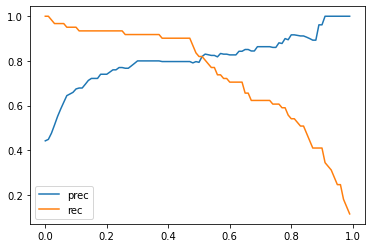

In [43]:
plt.plot(df_scores.thresholds, df_scores['prec'], label='prec')
plt.plot(df_scores.thresholds, df_scores['rec'], label='rec')
plt.legend()

In [44]:
def f1_score(p,r):
    a = p*r
    b = p+r
    c = a/b
    f1 = 2*c
    return f1

In [45]:
df_scores['f1_score'] = df_scores.apply(lambda x: f1_score(x['prec'],x['rec']), axis = 1)
df_scores[df_scores['f1_score'] == df_scores['f1_score'].max()]

,thresholds,prec,rec,f1_score
30,0.30,0.8,0.918033,0.854962
31,0.31,0.8,0.918033,0.854962
32,0.32,0.8,0.918033,0.854962
33,0.33,0.8,0.918033,0.854962
34,0.34,0.8,0.918033,0.854962
35,0.35,0.8,0.918033,0.854962
36,0.36,0.8,0.918033,0.854962
37,0.37,0.8,0.918033,0.854962


In [46]:
def train(df_train, y_train, C=1.0):

    dicts = df_train.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(solver = 'liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [47]:
def predict(df, dv, model):
    dicts = df.to_dict(orient='records')
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [50]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=2)



In [52]:
n_splits = 5

for C in tqdm([0.01, 0.1, 0.3, 0.4, 0.5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.approvalstatus.values
        y_val = df_val.approvalstatus.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/6 [00:00<?, ?it/s]

C=0.01 0.959 +- 0.014
C=0.1 0.997 +- 0.004
C=0.3 1.000 +- 0.000
C=0.4 1.000 +- 0.000
C=0.5 1.000 +- 0.000
C=10 1.000 +- 0.000


Tree-based Models - RF and XGBoost

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text
import xgboost as xgb

In [22]:
dv = DictVectorizer(sparse=False)
train_dicts = df_train.fillna(0).to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [23]:
rf = RandomForestClassifier(max_depth = 10)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [24]:
y_pred = rf.predict(X_val)
roc_auc_score(y_val, y_pred)


0.851394507132212

##### Test different parameters - RF

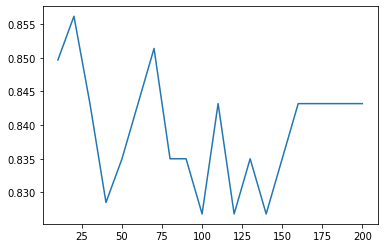

In [25]:
scores = []

for n in range (10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)  
    scores.append((n, roc_auc_score(y_val, y_pred)))

df_scores = pd.DataFrame(scores, columns=['n_estimators', 'roc_auc_score'])
plt.plot(df_scores.n_estimators, df_scores.roc_auc_score)    

In [26]:
values = [10, 15, 20, 25]
scores = []
for v in values:
    for n in range (10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, random_state=1, n_jobs=-1, max_depth = v)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)  
        scores.append((v, n, roc_auc_score(y_val, y_pred)))
        
df_depth_scores = pd.DataFrame(scores, columns = ['depth', 'estimators', 'roc_auc_score'] )        

In [34]:
df_depth_scores.roc_auc_score.max()

0.8872684692356824

In [36]:
df_depth_scores[df_depth_scores['roc_auc_score'] == 0.8872684692356824]

,depth,estimators,roc_auc_score
60,25,10,0.887268


In [39]:
rf = RandomForestClassifier(n_estimators=10, random_state=1, n_jobs=-1, max_depth = 25)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)  

roc_auc_score(y_val, y_pred)



0.8872684692356824

Train XGBoost

In [45]:
features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

c:\Users\rlong\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


In [48]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

watchlist = [(dtrain, 'train'), (dval, 'val')]
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, evals=watchlist)

y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred )

[0]	train-rmse:0.38505	val-rmse:0.42090
[1]	train-rmse:0.30568	val-rmse:0.37547


[2]	train-rmse:0.25033	val-rmse:0.35856
[3]	train-rmse:0.21453	val-rmse:0.34846
[4]	train-rmse:0.18640	val-rmse:0.34516
[5]	train-rmse:0.17509	val-rmse:0.34247
[6]	train-rmse:0.16005	val-rmse:0.34182
[7]	train-rmse:0.15084	val-rmse:0.34334
[8]	train-rmse:0.14311	val-rmse:0.34254
[9]	train-rmse:0.13920	val-rmse:0.34262
[10]	train-rmse:0.13609	val-rmse:0.34262
[11]	train-rmse:0.13368	val-rmse:0.34275
[12]	train-rmse:0.13107	val-rmse:0.34114
[13]	train-rmse:0.12682	val-rmse:0.34103
[14]	train-rmse:0.12370	val-rmse:0.34103
[15]	train-rmse:0.12154	val-rmse:0.34018
[16]	train-rmse:0.11939	val-rmse:0.33997
[17]	train-rmse:0.11716	val-rmse:0.34062
[18]	train-rmse:0.11530	val-rmse:0.34036
[19]	train-rmse:0.11373	val-rmse:0.34029
[20]	train-rmse:0.10948	val-rmse:0.34017
[21]	train-rmse:0.10789	val-rmse:0.34028
[22]	train-rmse:0.10651	val-rmse:0.34065
[23]	train-rmse:0.10520	val-rmse:0.34134
[24]	train-rmse:0.10344	val-rmse:0.34035
[25]	train-rmse:0.10171	val-rmse:0.33968
[26]	train-rmse:0.10041	

c:\Users\rlong\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[31]	train-rmse:0.09377	val-rmse:0.34186
[32]	train-rmse:0.09260	val-rmse:0.34197
[33]	train-rmse:0.09158	val-rmse:0.34143
[34]	train-rmse:0.09026	val-rmse:0.34140
[35]	train-rmse:0.08851	val-rmse:0.34126
[36]	train-rmse:0.08726	val-rmse:0.34111
[37]	train-rmse:0.08604	val-rmse:0.34178
[38]	train-rmse:0.08513	val-rmse:0.34302
[39]	train-rmse:0.08423	val-rmse:0.34360
[40]	train-rmse:0.08331	val-rmse:0.34362
[41]	train-rmse:0.08200	val-rmse:0.34320
[42]	train-rmse:0.08095	val-rmse:0.34339
[43]	train-rmse:0.07954	val-rmse:0.34368
[44]	train-rmse:0.07867	val-rmse:0.34402
[45]	train-rmse:0.07789	val-rmse:0.34410
[46]	train-rmse:0.07702	val-rmse:0.34430
[47]	train-rmse:0.07602	val-rmse:0.34438
[48]	train-rmse:0.07421	val-rmse:0.34404
[49]	train-rmse:0.07340	val-rmse:0.34462
[50]	train-rmse:0.07263	val-rmse:0.34505
[51]	train-rmse:0.07188	val-rmse:0.34510
[52]	train-rmse:0.07124	val-rmse:0.34516
[53]	train-rmse:0.07047	val-rmse:0.34505
[54]	train-rmse:0.06953	val-rmse:0.34527
[55]	train-rmse:

0.9018522461145413